# Measuring multiscale curvature and valley width in synthetic landscapes



In [1]:
import sys
sys.path.append('..')
sys.path.append('../TopoAnalysis/')

In [2]:
import rasterio
import numpy as np

In [4]:
from scipy.signal import sawtooth

In [5]:
from TopoAnalysis.dem import Elevation, FilledElevation, FlowDirectionD8, Area
from TopoAnalysis.dem import MultiscaleCurvatureValleyWidth as MCVW

In [25]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10, 10)

## Convenience functions

In [6]:
dataset = rasterio.open('data/sierras_pras_30m.tif')
default_profile = dataset.profile

In [7]:
def save_synthetic(data, filename, profile=default_profile):
    ny, nx = data.shape
    x0 = default_profile['transform'][2] - nx
    y0 = default_profile['transform'][5] - ny
    new_transform = rasterio.Affine(1., 0, x0, 0, -1., y0,)
    default_profile.update(count=1, width=nx, height=ny, dtype=np.float64, transform=new_transform)
    with rasterio.open(filename, 'w', **profile) as dest:
        dest.write(data, 1)

In [8]:
def triangle_grid(ny, nx, width, sig=0):
    f = nx / width
    t = np.linspace(0, 1, nx)
    y = sawtooth(2 * np.pi * f * t, width=0.5)
    triangle = np.tile(y, (ny, 1))
    triangle += sig * np.random.randn(ny, nx)
    triangle += np.abs(np.min(triangle))
    save_synthetic(triangle, 'data/triangle.tif')
    return triangle

In [9]:
def sinusoid_grid(ny, nx, width, sig=0):
    f = nx / width
    t = np.linspace(0, 1, nx)
    y = np.sin(2 * np.pi * f * t)
    sinusoid = np.tile(y, (ny, 1))
    sinusoid += sig * np.random.randn(ny, nx)
    sinusoid += np.abs(np.min(sinusoid))
    save_synthetic(sinusoid, 'data/sinusoid.tif')
    return sinusoid

## Triangular landscape

In [10]:
ny, nx = [500, 500]
width = 100

In [11]:
triangle = triangle_grid(ny, nx, width, sig=0.01)

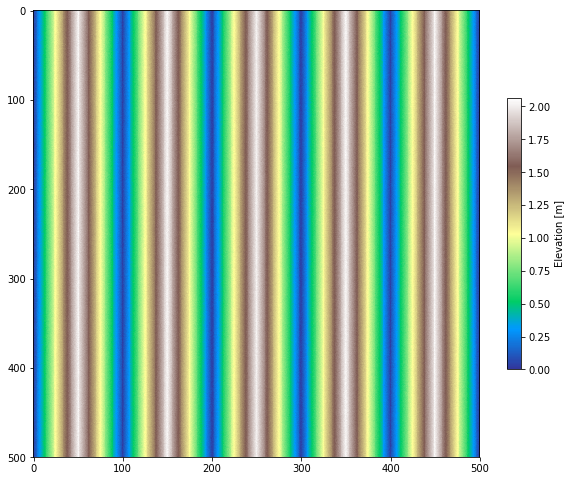

In [30]:
im = plt.imshow(triangle, cmap='terrain')
cb = plt.colorbar(im, label='Elevation [m]', shrink=0.5)

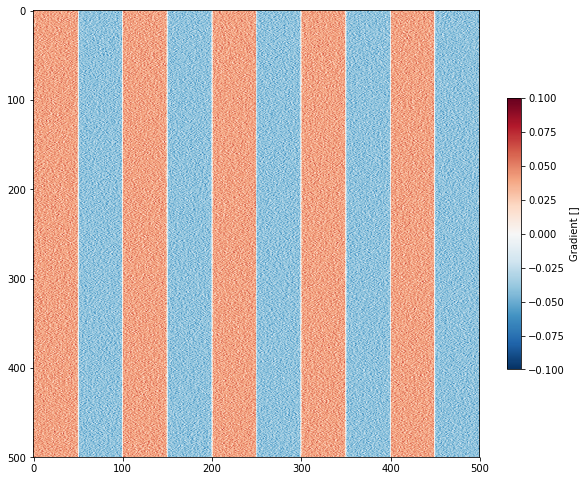

In [35]:
im = plt.imshow(np.gradient(triangle, axis=1), cmap='RdBu_r', vmin=-0.1, vmax=0.1)
cb = plt.colorbar(im, label='Gradient []', shrink=0.5)

In [13]:
elev = Elevation.load('data/triangle.tif')
filled = FilledElevation(elevation=elev)
fd = FlowDirectionD8(flooded_dem=filled)
area = Area(flow_direction=fd)

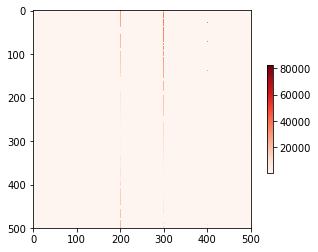

In [14]:
im = plt.imshow(area._griddata, cmap='Reds')
plt.colorbar(im, shrink=0.5)

In [15]:
ms = MCVW(elevation=elev, area=area, area_cutoff=1e3, min_width=10, max_width=110)

scale 1 / 100 10.0
scale 2 / 100 11.0
scale 3 / 100 12.0
scale 4 / 100 13.0
scale 5 / 100 14.0
scale 6 / 100 15.0
scale 7 / 100 16.0
scale 8 / 100 17.0
scale 9 / 100 18.0
scale 10 / 100 19.0
scale 11 / 100 20.0
scale 12 / 100 21.0
scale 13 / 100 22.0
scale 14 / 100 23.0
scale 15 / 100 24.0
scale 16 / 100 25.0
scale 17 / 100 26.0
scale 18 / 100 27.0
scale 19 / 100 28.0
scale 20 / 100 29.0
scale 21 / 100 30.0
scale 22 / 100 31.0
scale 23 / 100 32.0
scale 24 / 100 33.0
scale 25 / 100 34.0
scale 26 / 100 35.0
scale 27 / 100 36.0
scale 28 / 100 37.0
scale 29 / 100 38.0
scale 30 / 100 39.0
scale 31 / 100 40.0
scale 32 / 100 41.0
scale 33 / 100 42.0
scale 34 / 100 43.0
scale 35 / 100 44.0
scale 36 / 100 45.0
scale 37 / 100 46.0
scale 38 / 100 47.0
scale 39 / 100 48.0
scale 40 / 100 49.0
scale 41 / 100 50.0
scale 42 / 100 51.0
scale 43 / 100 52.0
scale 44 / 100 53.0
scale 45 / 100 54.0
scale 46 / 100 55.0
scale 47 / 100 56.0
scale 48 / 100 57.0
scale 49 / 100 58.0
scale 50 / 100 59.0
scale 51 

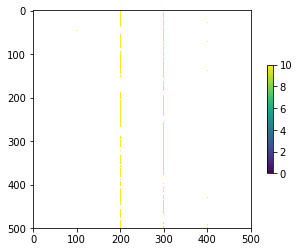

In [16]:
im = plt.imshow(ms._griddata, vmin=0)
plt.colorbar(im, shrink=0.5)

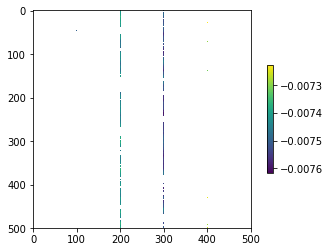

In [17]:
im = plt.imshow(ms._minC)
plt.colorbar(im, shrink=0.5)

## Sinusoidal landscape

In [18]:
sinusoid = sinusoid_grid(ny, nx, width, sig=0.01)

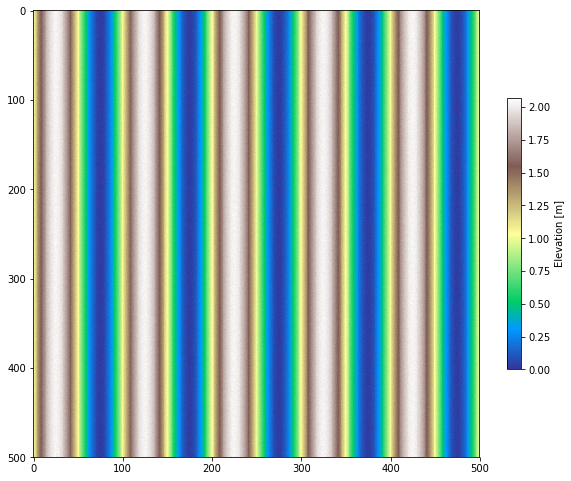

In [29]:
im = plt.imshow(sinusoid, cmap='terrain')
cb = plt.colorbar(im, label='Elevation [m]', shrink=0.5)

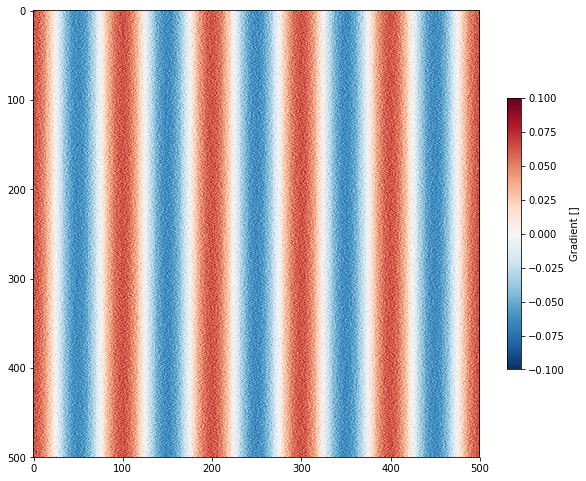

In [34]:
im = plt.imshow(np.gradient(sinusoid, axis=1), cmap='RdBu_r', vmin=-0.1, vmax=0.1)
cb = plt.colorbar(im, label='Gradient []', shrink=0.5)

In [20]:
elev = Elevation.load('data/sinusoid.tif')
filled = FilledElevation(elevation=elev)
fd = FlowDirectionD8(flooded_dem=filled)
area = Area(flow_direction=fd)

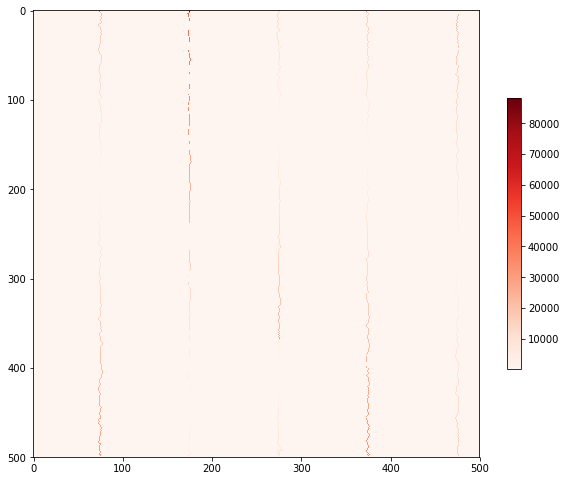

In [27]:
im = plt.imshow(area._griddata, cmap='Reds')
plt.colorbar(im, shrink=0.5)

In [22]:
ms = MCVW(elevation=elev, area=area, area_cutoff=1e3, min_width=10, max_width=110)

scale 1 / 100 10.0
scale 2 / 100 11.0
scale 3 / 100 12.0
scale 4 / 100 13.0
scale 5 / 100 14.0
scale 6 / 100 15.0
scale 7 / 100 16.0
scale 8 / 100 17.0
scale 9 / 100 18.0
scale 10 / 100 19.0
scale 11 / 100 20.0
scale 12 / 100 21.0
scale 13 / 100 22.0
scale 14 / 100 23.0
scale 15 / 100 24.0
scale 16 / 100 25.0
scale 17 / 100 26.0
scale 18 / 100 27.0
scale 19 / 100 28.0
scale 20 / 100 29.0
scale 21 / 100 30.0
scale 22 / 100 31.0
scale 23 / 100 32.0
scale 24 / 100 33.0
scale 25 / 100 34.0
scale 26 / 100 35.0
scale 27 / 100 36.0
scale 28 / 100 37.0
scale 29 / 100 38.0
scale 30 / 100 39.0
scale 31 / 100 40.0
scale 32 / 100 41.0
scale 33 / 100 42.0
scale 34 / 100 43.0
scale 35 / 100 44.0
scale 36 / 100 45.0
scale 37 / 100 46.0
scale 38 / 100 47.0
scale 39 / 100 48.0
scale 40 / 100 49.0
scale 41 / 100 50.0
scale 42 / 100 51.0
scale 43 / 100 52.0
scale 44 / 100 53.0
scale 45 / 100 54.0
scale 46 / 100 55.0
scale 47 / 100 56.0
scale 48 / 100 57.0
scale 49 / 100 58.0
scale 50 / 100 59.0
scale 51 

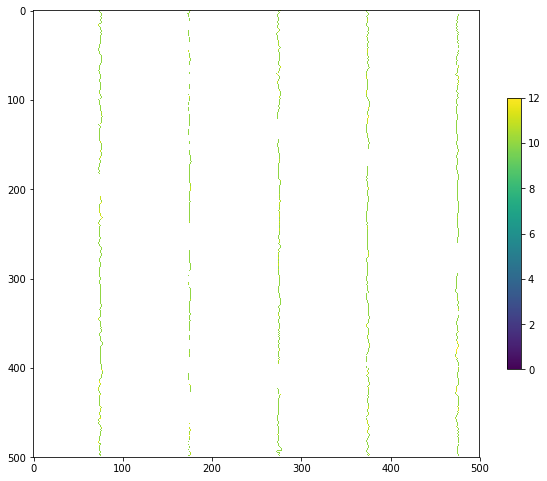

In [26]:
im = plt.imshow(ms._griddata, vmin=0)
plt.colorbar(im, shrink=0.5)

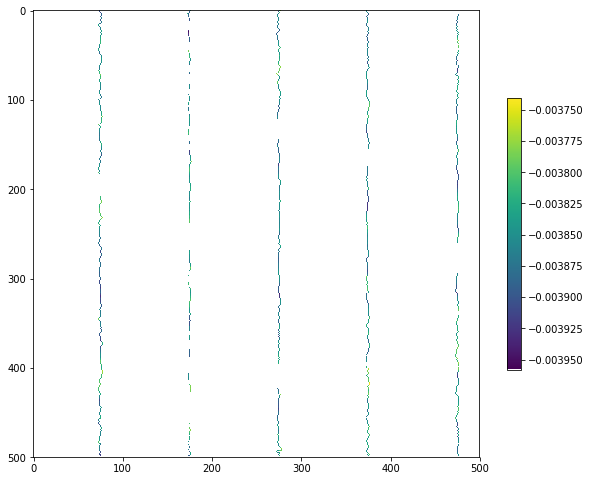

In [28]:
im = plt.imshow(ms._minC)
plt.colorbar(im, shrink=0.5)